# Statistical for NYC Property Sales
Data = https://www.kaggle.com/datasets/new-york-city/nyc-property-sales

# Import Libraries

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import math
import statistics
import scipy.stats
import statsmodels.api as sm


%matplotlib inline
sns.set(style='white', context='notebook', palette='deep') 
import matplotlib.style as style
style.use('fivethirtyeight')

# Reading DataSet

In [99]:
data_sales = pd.read_csv('data/nyc-rolling-sales.csv')
data_sales.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [100]:
data_sales.shape

(84548, 22)

In [101]:
data_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

# Data Cleaning

In [102]:
data_sales.drop(['Unnamed: 0', 'EASE-MENT'],axis=1, inplace=True)

In [103]:
# Replacing numeric values with BOROUGH names
data_sales['BOROUGH'] = data_sales.BOROUGH.replace({1:'Redbridge', 2:'London', 3:'Brooklyn', 4:'Croydon', 5:'Greenwich'})

In [104]:
data_sales['SALE YEAR'] = pd.DatetimeIndex(data_sales['SALE DATE']).year
data_sales['SALE MONTH'] = pd.DatetimeIndex(data_sales['SALE DATE']).month_name()

In [105]:
data_sales['SALE DATE'] = pd.to_datetime(data_sales['SALE DATE'], errors='coerce')

data_sales['SALE PRICE'] = pd.to_numeric(data_sales['SALE PRICE'], errors='coerce')


data_sales['LAND SQUARE FEET'] = pd.to_numeric(data_sales['LAND SQUARE FEET'], errors='coerce')
data_sales['GROSS SQUARE FEET']= pd.to_numeric(data_sales['GROSS SQUARE FEET'], errors='coerce')

data_sales['TAX CLASS AT TIME OF SALE'] = data_sales['TAX CLASS AT TIME OF SALE'].astype('category')
data_sales['TAX CLASS AT PRESENT'] = data_sales['TAX CLASS AT PRESENT'].astype('category')
data_sales['BOROUGH'] = data_sales['BOROUGH'].astype('category')

In [106]:
data_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         84548 non-null  category      
 1   NEIGHBORHOOD                    84548 non-null  object        
 2   BUILDING CLASS CATEGORY         84548 non-null  object        
 3   TAX CLASS AT PRESENT            84548 non-null  category      
 4   BLOCK                           84548 non-null  int64         
 5   LOT                             84548 non-null  int64         
 6   BUILDING CLASS AT PRESENT       84548 non-null  object        
 7   ADDRESS                         84548 non-null  object        
 8   APARTMENT NUMBER                84548 non-null  object        
 9   ZIP CODE                        84548 non-null  int64         
 10  RESIDENTIAL UNITS               84548 non-null  int64         
 11  CO

In [107]:
sum(data_sales.duplicated())

765

In [108]:
data_sales = data_sales.drop_duplicates(data_sales.columns, keep='last')
sum(data_sales.duplicated(data_sales.columns))

0

# Data Inspection & Visualization

In [109]:
data_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83783 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         83783 non-null  category      
 1   NEIGHBORHOOD                    83783 non-null  object        
 2   BUILDING CLASS CATEGORY         83783 non-null  object        
 3   TAX CLASS AT PRESENT            83783 non-null  category      
 4   BLOCK                           83783 non-null  int64         
 5   LOT                             83783 non-null  int64         
 6   BUILDING CLASS AT PRESENT       83783 non-null  object        
 7   ADDRESS                         83783 non-null  object        
 8   APARTMENT NUMBER                83783 non-null  object        
 9   ZIP CODE                        83783 non-null  int64         
 10  RESIDENTIAL UNITS               83783 non-null  int64         
 11  CO

In [110]:
data_sales.columns[data_sales.isnull().any()]

Index(['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE'], dtype='object')

In [111]:
# fill the missing values with mean values.
data_sales['LAND SQUARE FEET']=data_sales['LAND SQUARE FEET'].fillna(data_sales['LAND SQUARE FEET'].mean())
data_sales['GROSS SQUARE FEET']=data_sales['GROSS SQUARE FEET'].fillna(data_sales['GROSS SQUARE FEET'].mean())

In [112]:
data = data_sales[data_sales['SALE PRICE'].notnull()]

In [113]:
print(data.shape)
data.head(5)

(69607, 22)


,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,...,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,SALE YEAR,SALE MONTH
0,Redbridge,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,...,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19,2017,July
3,Redbridge,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,...,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23,2016,September
4,Redbridge,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,...,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17,2016,November
6,Redbridge,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,210 AVENUE B,,10009,...,8,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23,2016,September
9,Redbridge,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,D9,629 EAST 5TH STREET,,10009,...,24,4489.0,18523.0,1920,2,D9,16232000.0,2016-11-07,2016,November


In [114]:
data.describe()

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,SALE YEAR
count,69607.000000,69607.000000,69607.000000,69607.000000,69607.000000,69607.000000,6.960700e+04,6.960700e+04,69607.000000,6.960700e+04,69607.000000
mean,4199.890140,374.580473,10741.159323,1.875070,0.164121,2.059319,3.638934e+03,3.642753e+03,1799.852184,1.280703e+06,2016.655293
std,3431.897518,656.232024,1264.804508,14.291398,8.997236,16.992716,3.315376e+04,2.422798e+04,520.099311,1.143036e+07,0.475276
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,2016.000000
25%,1350.000000,22.000000,10306.000000,0.000000,0.000000,0.000000,1.900000e+03,1.266000e+03,1920.000000,2.300000e+05,2016.000000
50%,3378.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,2.945000e+03,2.400000e+03,1938.000000,5.330000e+05,2017.000000
75%,6192.000000,820.000000,11249.000000,2.000000,0.000000,2.000000,3.854481e+03,3.894416e+03,1965.000000,9.500000e+05,2017.000000
max,16319.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,4.252327e+06,3.750565e+06,2017.000000,2.210000e+09,2017.000000


> Sale Price

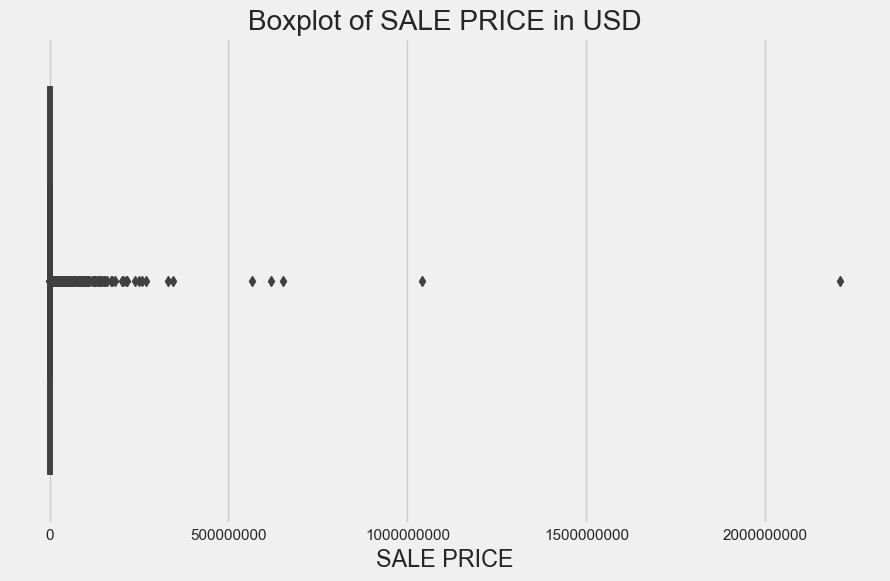

In [115]:
plt.figure(figsize=(10,6))

sns.boxplot(x='SALE PRICE', data=data)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Boxplot of SALE PRICE in USD')
plt.show()

In [116]:
# Remove observations that fall outside those caps
data = data[(data['SALE PRICE'] > 100000) & (data['SALE PRICE'] < 5000000)]

> Gross Square Feet

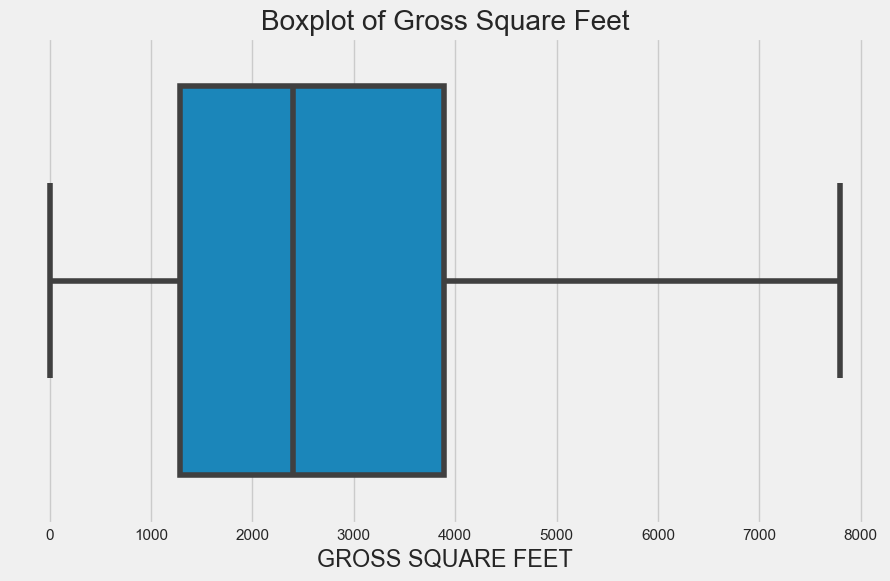

In [117]:
plt.figure(figsize=(10,6))
sns.boxplot(x='GROSS SQUARE FEET', data=data, showfliers=False)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Boxplot of Gross Square Feet')
plt.show()

> Land Square Feet

Text(0.5, 1.0, 'Boxplot of Land Square Feet')

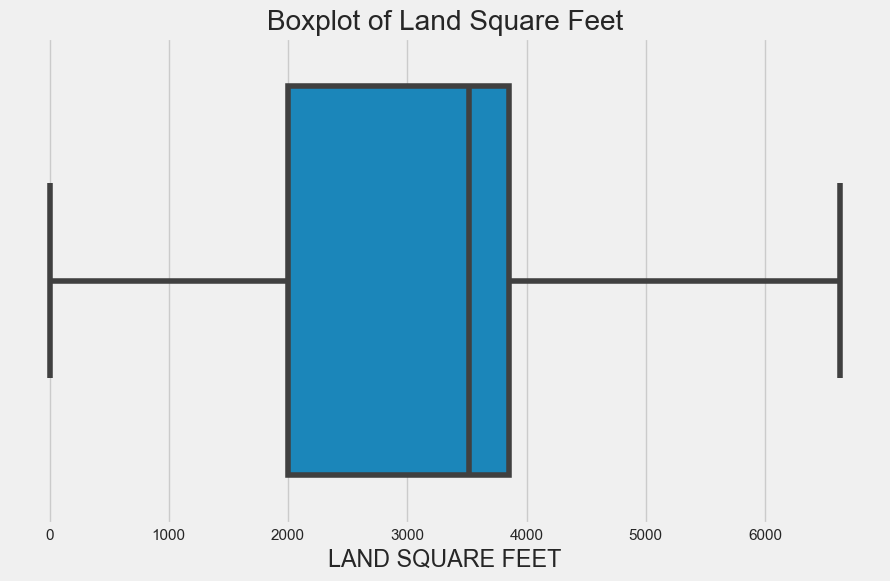

In [118]:
plt.figure(figsize=(10,6))
sns.boxplot(x='LAND SQUARE FEET', data=data,showfliers=False)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Boxplot of Land Square Feet')

In [119]:
data = data[data['GROSS SQUARE FEET'] < 10000]
data = data[data['LAND SQUARE FEET'] < 10000]

In [120]:
data.shape

(53856, 22)

> Mean

In [121]:
SalePrice_mean = np.mean(data['SALE PRICE'], axis=0)
LandSqrFeet_mean = np.mean(data["LAND SQUARE FEET"], axis=0)
GrossSqrFeet_mean = np.mean(data["GROSS SQUARE FEET"], axis=0)

print("Mean of Sale Price:", SalePrice_mean)
print("Mean of Land Square Feet:", LandSqrFeet_mean)
print("Mean of Gross Square Feet:", GrossSqrFeet_mean)

Mean of Sale Price: 854328.5140745692
Mean of Land Square Feet: 2845.493419463693
Mean of Gross Square Feet: 2438.183230448704


In [122]:
data_mean1 = data.groupby(["SALE YEAR", "SALE MONTH"])[['TOTAL UNITS', 'SALE PRICE']].mean()
data_mean1

TOTAL UNITS     SALE PRICE
SALE YEAR SALE MONTH                            
2016      December       1.194002  821042.929679
          November       1.153023  801429.321860
          October        1.663443  814061.036509
          September      1.159385  813253.666256
2017      April          1.140652  857554.699776
          August         1.017963  908109.114911
          February       1.170272  846440.849095
          January        1.114043  873543.082377
          July           1.079343  902202.785797
          June           1.091143  907824.341602
          March          1.154265  836604.530287
          May            1.122505  866466.604329

In [123]:
data_mean2 = data.groupby(["BOROUGH"])[['TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE']].mean()
data_mean2.sort_values(["SALE PRICE"], ascending=False, inplace=True)
data_mean2

,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
BOROUGH,,,,
Redbridge,0.523631,3809.810511,3896.159239,1.380573e+06
Brooklyn,1.488089,1313.955136,1324.359608,9.738906e+05
Croydon,1.231887,3416.163152,2666.373846,6.021809e+05
Greenwich,1.247703,3571.588848,2017.306941,4.836620e+05
London,1.571687,2027.103964,1647.200680,4.518542e+05


> Median

In [124]:
SalePrice_median = statistics.median(data['SALE PRICE'])
LandSqrFeet_median = statistics.median(data["LAND SQUARE FEET"])
GrossSqrFeet_median = statistics.median(data["GROSS SQUARE FEET"])

print("Median of Sale Price:", SalePrice_median)
print("Median of Land Square Feet:", LandSqrFeet_median)
print("Median of Gross Square Feet:", GrossSqrFeet_median)

Median of Sale Price: 625000.0
Median of Land Square Feet: 3400.0
Median of Gross Square Feet: 2384.0


In [125]:
data_median1 = data.groupby(["SALE YEAR", "SALE MONTH"])[['TOTAL UNITS', 'SALE PRICE']].median()
data_median1

TOTAL UNITS  SALE PRICE
SALE YEAR SALE MONTH                         
2016      December            1.0    600000.0
          November            1.0    590000.0
          October             1.0    600000.0
          September           1.0    599000.0
2017      April               1.0    608500.0
          August              1.0    699000.0
          February            1.0    610000.0
          January             1.0    628000.0
          July                1.0    670000.0
          June                1.0    660315.0
          March               1.0    600000.0
          May                 1.0    642500.0

In [126]:
data_median2 = data.groupby(["BOROUGH"])[['TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE']].median()
data_median2.sort_values(["SALE PRICE"], ascending=False, inplace=True)
data_median2

,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
BOROUGH,,,,
Redbridge,0.0,3854.481179,3894.415813,998500.0
Brooklyn,1.0,1600.000000,1166.000000,775000.0
Croydon,1.0,3854.481179,2440.000000,505000.0
Greenwich,1.0,3750.000000,1678.000000,465426.0
London,1.0,2185.000000,1665.000000,410000.0


> Mode

In [127]:
pd.DataFrame(data).mode()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,...,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,SALE YEAR,SALE MONTH
0,Croydon,FLUSHING-NORTH,01 ONE FAMILY DWELLINGS,1,5066,1,D4,131-05 40TH ROAD,,10314,...,1,3854.481179,3894.415813,1920,2,D4,450000.0,2017-06-29,2017,June


# Range

In [128]:
SalePrice_range = np.ptp(data['SALE PRICE'])
LandSqrFeet_range = np.ptp(data["LAND SQUARE FEET"])
GrossSqrFeet_range = np.ptp(data["GROSS SQUARE FEET"])

print("Range of Sale Price:", SalePrice_range)
print("Range of Land Square Feet:", LandSqrFeet_range)
print("Range of Gross Square Feet:", GrossSqrFeet_range)

Range of Sale Price: 4896506.0
Range of Land Square Feet: 9996.0
Range of Gross Square Feet: 9926.0


# Variance

In [129]:
SalePrice_var = statistics.variance(data['SALE PRICE'])
LandSqrFeet_var = statistics.variance(data["LAND SQUARE FEET"])
GrossSqrFeet_var = statistics.variance(data["GROSS SQUARE FEET"])

print("variance of Sale Price:", SalePrice_var)
print("variance of Land Square Feet:", LandSqrFeet_var)
print("variance of Gross Square Feet:", GrossSqrFeet_var)

variance of Sale Price: 574371544367.3818
variance of Land Square Feet: 2485824.8069760115
variance of Gross Square Feet: 2316348.2062864993


In [130]:
data_var = data.groupby(["BOROUGH"])[['TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE']].var()
data_var.sort_values(["SALE PRICE"], ascending=False, inplace=True)
data_var

,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
BOROUGH,,,,
Redbridge,0.948727,1.008394e+05,6.704443e+04,1.057040e+12
Brooklyn,1.959280,1.928605e+06,2.340782e+06,5.521584e+11
Croydon,295.434639,1.195218e+06,1.513293e+06,1.811692e+11
London,2.172873,2.782941e+06,2.173588e+06,1.083198e+11
Greenwich,0.424572,2.795339e+06,1.073571e+06,4.568666e+10


# Standard Deviation

In [131]:
SalePrice_std = np.std(data['SALE PRICE'])
LandSqrFeet_std = np.std(data["LAND SQUARE FEET"])
GrossSqrFeet_std = np.std(data["GROSS SQUARE FEET"])

print("Standard Deviation of Sale Price:", SalePrice_std)
print("Standard Deviation of Land Square Feet:", LandSqrFeet_std)
print("Standard Deviation of Gross Square Feet:", GrossSqrFeet_std)

Standard Deviation of Sale Price: 757866.0036031648
Standard Deviation of Land Square Feet: 1576.6352305139085
Standard Deviation of Gross Square Feet: 1521.9412591346882


In [132]:
data_std = data.groupby(["BOROUGH"])[['TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE']].std()
data_std.sort_values(["SALE PRICE"], ascending=False, inplace=True)
data_std

,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
BOROUGH,,,,
Redbridge,0.974026,317.552226,258.929393,1.028125e+06
Brooklyn,1.399743,1388.742374,1529.961288,7.430736e+05
Croydon,17.188212,1093.260266,1230.159755,4.256398e+05
London,1.474067,1668.215037,1474.309403,3.291198e+05
Greenwich,0.651592,1671.926611,1036.132843,2.137444e+05


# Probability Distribution

c:\Users\Dwi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SALE PRICE', ylabel='Density'>

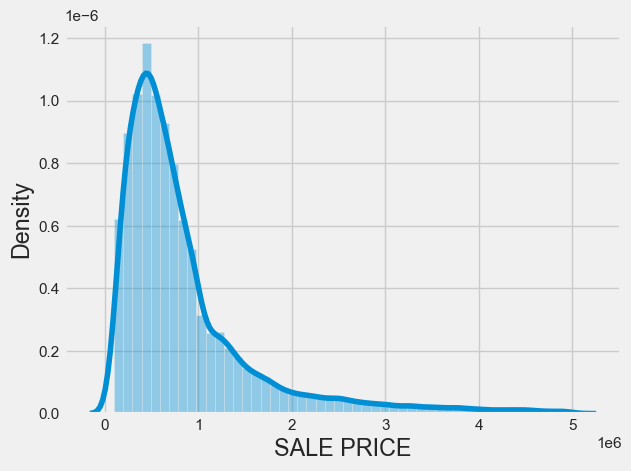

In [133]:
sns.distplot(data['SALE PRICE'])

# Confidence Interval

> CI of Mean

In [134]:
CI_Borough = data.groupby(["BOROUGH"]).agg({"SALE PRICE": [np.mean, np.std, np.size]})
CI_Borough


SALE PRICE                     
                   mean           std   size
BOROUGH                                     
Brooklyn   9.738906e+05  7.430736e+05  14399
Croydon    6.021809e+05  4.256398e+05  17349
Greenwich  4.836620e+05  2.137444e+05   5442
London     4.518542e+05  3.291198e+05   4415
Redbridge  1.380573e+06  1.028125e+06  12251

In [138]:
mean_Croydon = 6.021809e+05
std_Croydon = 4.256398e+05
n = 17349
z = 1.96 

In [140]:
se = std_Croydon/ np.sqrt(n)

lcb = mean_Croydon - z * se
ucb = mean_Croydon + z * se

print("Confidence Interval: ", lcb, 'and' , ucb)

Confidence Interval:  595847.1476519895 and 608514.6523480106


In [142]:
CI_bcc = data.groupby(["BUILDING CLASS CATEGORY", "BOROUGH"]).agg({"SALE PRICE": [np.mean, np.std, np.size]})
CI_bcc.head()

SALE PRICE  \
                                                               mean   
BUILDING CLASS CATEGORY                     BOROUGH                   
01 ONE FAMILY DWELLINGS                     Brooklyn   8.769684e+05   
                                            Croydon    6.159284e+05   
                                            Greenwich  4.773104e+05   
                                            London     4.252086e+05   
                                            Redbridge  2.521223e+06   

                                                                             
                                                                std    size  
BUILDING CLASS CATEGORY                     BOROUGH                          
01 ONE FAMILY DWELLINGS                     Brooklyn   6.894051e+05  2228.0  
                                            Croydon    3.039587e+05  5666.0  
                                            Greenwich  1.804808e+05  3318.0  
                                            London     1.946719e+05   982.0  
                                            Redbridge  1.300247e+06    27.0

In [144]:
mean_01 = 6.159284e+05
std_01 = 3.039587e+05
n = 5666
z = 1.96 

In [146]:
se = std_01/ np.sqrt(n)

lcb = mean_01 - z * se
ucb = mean_01 + z * se

print("Confidence Interval: ", lcb, 'and' , ucb)

Confidence Interval:  608013.7381482649 and 623843.0618517351


In [147]:
data.describe()

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,SALE YEAR
count,53856.000000,53856.000000,53856.000000,53856.000000,53856.000000,53856.000000,53856.000000,53856.000000,53856.000000,5.385600e+04,53856.000000
mean,4246.096702,386.879029,10750.708705,1.077707,0.084503,1.168728,2845.493419,2438.183230,1819.115085,8.543285e+05,2016.663064
std,3575.568192,668.535595,1162.760405,1.151425,9.746910,9.811443,1576.649868,1521.955389,490.927545,7.578730e+05,0.472667
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.003350e+05,2016.000000
25%,1334.000000,21.000000,10304.000000,0.000000,0.000000,0.000000,1980.000000,1280.000000,1920.000000,3.950000e+05,2016.000000
50%,3310.500000,50.000000,11209.000000,1.000000,0.000000,1.000000,3400.000000,2384.000000,1941.000000,6.250000e+05,2017.000000
75%,6246.000000,1002.000000,11358.000000,1.000000,0.000000,2.000000,3854.481179,3894.415813,1966.000000,9.900000e+05,2017.000000
max,16319.000000,9106.000000,11694.000000,20.000000,2261.000000,2261.000000,9996.000000,9926.000000,2017.000000,4.996841e+06,2017.000000


# Kesimpulan

- Data yang digunakan untuk perhitungan statistik di tugas ini didapati dari hasil data cleaning dan inspection yang mana berjumlah 53856. Data ini pada awalnya berjumlah 84548 
- Dari kelima Borough, yang memiliki harga jual dengan rata-rata dan nilai tengah yang tertinggi adalah Redbridge
- Confidence Interval untuk rata-rata harga jual properti di daerah Queens berada di interval 595847.1476519895 dan 608514.6523480106 USD
- Confidence Interval untuk rata-rata harga jual kategori kelas bangunan One Family Dwellings di Croydon berada di interval 608013.7381482649 dan 623843.0618517351 USD